In [2]:
import pandas as pd

# 讀取 CSV 檔案
data = pd.read_csv("revised_data_v1.0.csv")

# 顯示前 5 筆資料
print(data.head())

   Release_No     MI_ID   AGE  SEX  OSTEOPOROSIS_SELF  DIABETES_SELF  \
0  ABBM042247  P0002544  51.0  2.0                0.0            0.0   
1  ABBM070489  P0005099  56.0  1.0                0.0            0.0   
2  ABBM071227  P0001971  59.0  1.0                0.0            0.0   
3  ABBM089046  P0002566  39.0  2.0                0.0            0.0   
4  ABBM020828  P0002509  58.0  2.0                0.0            0.0   

   DIABETES_SELF_KIND  BODY_HEIGHT  BODY_WEIGHT        BMI  ...  \
0                   0        148.0         45.5  20.772462  ...   
1                   0        164.0         64.1  23.832540  ...   
2                   0        164.0         80.8  30.041642  ...   
3                   0        165.5         80.1  29.243983  ...   
4                   0        153.5         53.3  22.620930  ...   

   Spine_Fn1_BCF  Spine_Fn1_TH  HipL_Fn1_Total_BMD_CV  HipL_Fn1_ACF  \
0          1.006         5.427                    1.0         1.023   
1          1.006      

In [10]:
# 將 Spine_Tot_T(脊椎T score)作為y， 年齡(AGE)、BMI、有無糖尿病(DIABETES_SELF)作為 X1, X2, X3
# 進行線性迴歸分析
import statsmodels.api as sm

X = data[['AGE', 'BMI', 'DIABETES_SELF']]
y = data['Spine_Tot_T']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:            Spine_Tot_T   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     1473.
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:09:15   Log-Likelihood:                -37258.
No. Observations:               22134   AIC:                         7.452e+04
Df Residuals:                   22130   BIC:                         7.456e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3800      0.076    -18.085

### Spine_Tot_T

                            OLS Regression Results                            
Dep. Variable:            Spine_Tot_T   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     1473.
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:28:12   Log-Likelihood:                -37258.
No. Observations:               22134   AIC:                         7.452e+04
Df Residuals:                   22130   BIC:                         7.456e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3800      0.076    -18.085

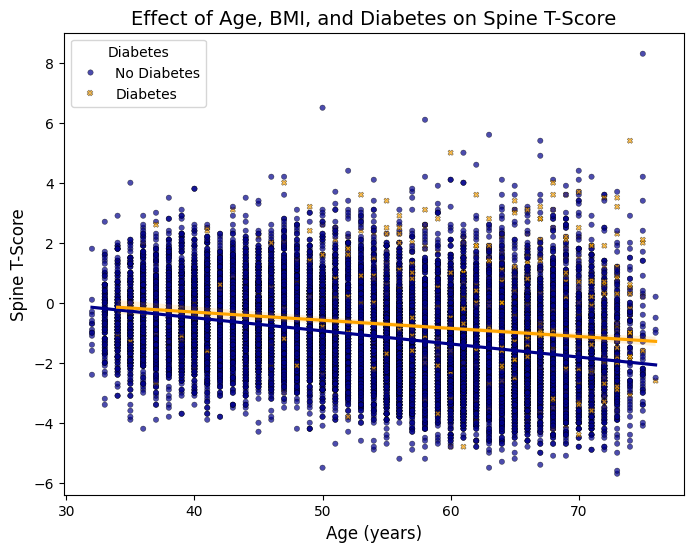

In [20]:
# 將 Spine_Tot_T(脊椎T score)作為y， 年齡(AGE)、BMI、有無糖尿病(DIABETES_SELF)作為 X1, X2, X3
# 進行線性迴歸分析

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 確保數據中沒有遺失值
data = data.dropna(subset=["Spine_Tot_T", "AGE", "BMI", "DIABETES_SELF"])

# 進行線性回歸
X = data[["AGE", "BMI", "DIABETES_SELF"]]
X = sm.add_constant(X)
y = data["Spine_Tot_T"]
model = sm.OLS(y, X).fit()
print(model.summary())  

# 繪製圖表
plt.figure(figsize=(8,6))

# 🎯 **修正圖例顯示**
scatter = sns.scatterplot(
    data=data, x="AGE", y="Spine_Tot_T", 
    hue="DIABETES_SELF", style="DIABETES_SELF",
    palette={0: "darkblue", 1: "orange"},
    s=15, edgecolor="black", alpha=0.7
)

# 🎯 **繪製回歸線**
sns.regplot(
    data=data[data["DIABETES_SELF"] == 0], 
    x="AGE", y="Spine_Tot_T",
    scatter=False, color="darkblue", label="No Diabetes"
)

sns.regplot(
    data=data[data["DIABETES_SELF"] == 1], 
    x="AGE", y="Spine_Tot_T",
    scatter=False, color="orange", label="Diabetes"
)

# 🎯 **手動修正圖例**
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, ["No Diabetes", "Diabetes"], title="Diabetes", loc="upper left")

# 設定標題與座標軸
plt.title("Effect of Age, BMI, and Diabetes on Spine T-Score", fontsize=14)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Spine T-Score", fontsize=12)

plt.show()


### HipL_Tot_T

                            OLS Regression Results                            
Dep. Variable:             HipL_Tot_T   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     2541.
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:34:07   Log-Likelihood:                -27433.
No. Observations:               22134   AIC:                         5.487e+04
Df Residuals:                   22130   BIC:                         5.491e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.2348      0.049    -45.650

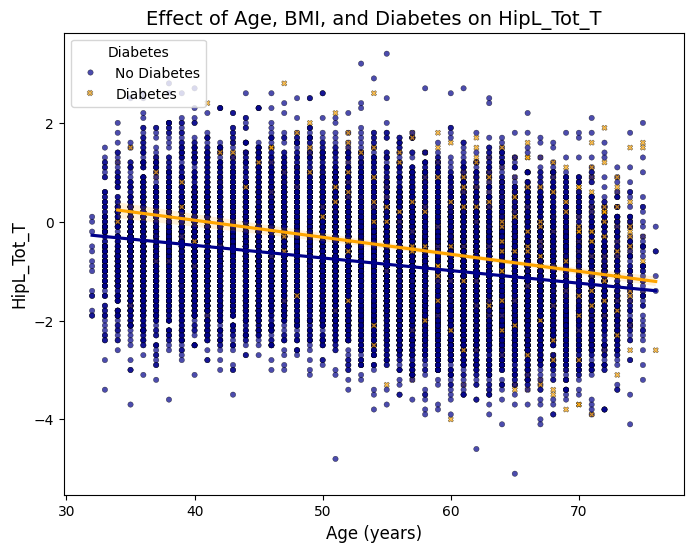

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 確保數據中沒有遺失值
data = data.dropna(subset=["HipL_Tot_T", "AGE", "BMI", "DIABETES_SELF"])

# 進行線性回歸
X = data[["AGE", "BMI", "DIABETES_SELF"]]
X = sm.add_constant(X)
y = data["HipL_Tot_T"]
model = sm.OLS(y, X).fit()
print(model.summary())  

# 繪製圖表
plt.figure(figsize=(8,6))

# 🎯 **修正圖例顯示**
scatter = sns.scatterplot(
    data=data, x="AGE", y="HipL_Tot_T", 
    hue="DIABETES_SELF", style="DIABETES_SELF",
    palette={0: "darkblue", 1: "orange"},
    s=15, edgecolor="black", alpha=0.7
)

# 🎯 **繪製回歸線**
sns.regplot(
    data=data[data["DIABETES_SELF"] == 0], 
    x="AGE", y="HipL_Tot_T",
    scatter=False, color="darkblue", label="No Diabetes"
)

sns.regplot(
    data=data[data["DIABETES_SELF"] == 1], 
    x="AGE", y="HipL_Tot_T",
    scatter=False, color="orange", label="Diabetes"
)

# 🎯 **手動修正圖例**
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, ["No Diabetes", "Diabetes"], title="Diabetes", loc="upper left")

# 設定標題與座標軸
plt.title("Effect of Age, BMI, and Diabetes on HipL_Tot_T", fontsize=14)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("HipL_Tot_T", fontsize=12)

plt.show()

### HipR_Tot_T

                            OLS Regression Results                            
Dep. Variable:             HipR_Tot_T   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     2321.
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:36:34   Log-Likelihood:                -27251.
No. Observations:               22134   AIC:                         5.451e+04
Df Residuals:                   22130   BIC:                         5.454e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.0693      0.049    -42.621

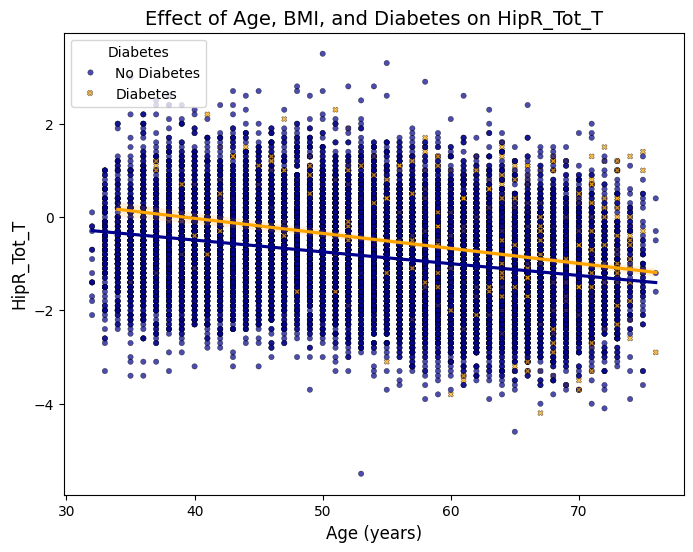

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 確保數據中沒有遺失值
data = data.dropna(subset=["HipR_Tot_T", "AGE", "BMI", "DIABETES_SELF"])

# 進行線性回歸
X = data[["AGE", "BMI", "DIABETES_SELF"]]
X = sm.add_constant(X)
y = data["HipR_Tot_T"]
model = sm.OLS(y, X).fit()
print(model.summary())  

# 繪製圖表
plt.figure(figsize=(8,6))

# 🎯 **修正圖例顯示**
scatter = sns.scatterplot(
    data=data, x="AGE", y="HipR_Tot_T", 
    hue="DIABETES_SELF", style="DIABETES_SELF",
    palette={0: "darkblue", 1: "orange"},
    s=15, edgecolor="black", alpha=0.7
)

# 🎯 **繪製回歸線**
sns.regplot(
    data=data[data["DIABETES_SELF"] == 0], 
    x="AGE", y="HipR_Tot_T",
    scatter=False, color="darkblue", label="No Diabetes"
)

sns.regplot(
    data=data[data["DIABETES_SELF"] == 1], 
    x="AGE", y="HipR_Tot_T",
    scatter=False, color="orange", label="Diabetes"
)

# 🎯 **手動修正圖例**
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, ["No Diabetes", "Diabetes"], title="Diabetes", loc="upper left")

# 設定標題與座標軸
plt.title("Effect of Age, BMI, and Diabetes on HipR_Tot_T", fontsize=14)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("HipR_Tot_T", fontsize=12)

plt.show()

### 超音波

                            OLS Regression Results                            
Dep. Variable:       BONE_EXAM_RESULT   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     1440.
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:39:20   Log-Likelihood:                -92361.
No. Observations:               22134   AIC:                         1.847e+05
Df Residuals:                   22130   BIC:                         1.848e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           107.6781      0.920    117.054

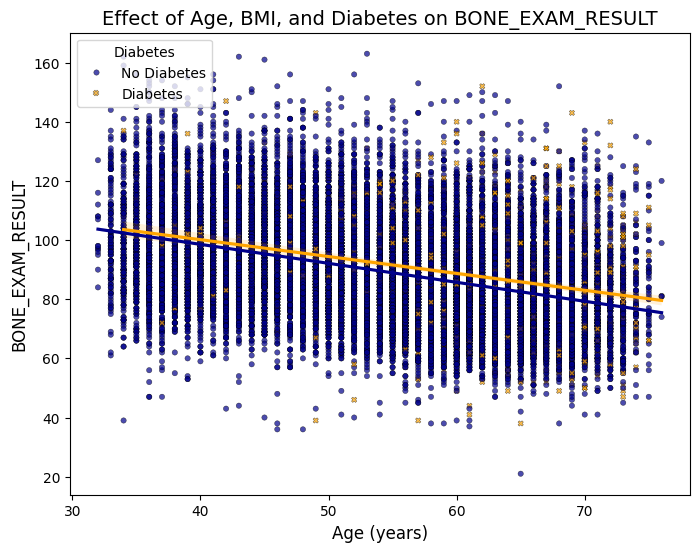

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 確保數據中沒有遺失值
data = data.dropna(subset=["BONE_EXAM_RESULT", "AGE", "BMI", "DIABETES_SELF"])

# 進行線性回歸
X = data[["AGE", "BMI", "DIABETES_SELF"]]
X = sm.add_constant(X)
y = data["BONE_EXAM_RESULT"]
model = sm.OLS(y, X).fit()
print(model.summary())  

# 繪製圖表
plt.figure(figsize=(8,6))

# 🎯 **修正圖例顯示**
scatter = sns.scatterplot(
    data=data, x="AGE", y="BONE_EXAM_RESULT", 
    hue="DIABETES_SELF", style="DIABETES_SELF",
    palette={0: "darkblue", 1: "orange"},
    s=15, edgecolor="black", alpha=0.7
)

# 🎯 **繪製回歸線**
sns.regplot(
    data=data[data["DIABETES_SELF"] == 0], 
    x="AGE", y="BONE_EXAM_RESULT",
    scatter=False, color="darkblue", label="No Diabetes"
)

sns.regplot(
    data=data[data["DIABETES_SELF"] == 1], 
    x="AGE", y="BONE_EXAM_RESULT",
    scatter=False, color="orange", label="Diabetes"
)

# 🎯 **手動修正圖例**
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, ["No Diabetes", "Diabetes"], title="Diabetes", loc="upper left")

# 設定標題與座標軸
plt.title("Effect of Age, BMI, and Diabetes on BONE_EXAM_RESULT", fontsize=14)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("BONE_EXAM_RESULT", fontsize=12)

plt.show()

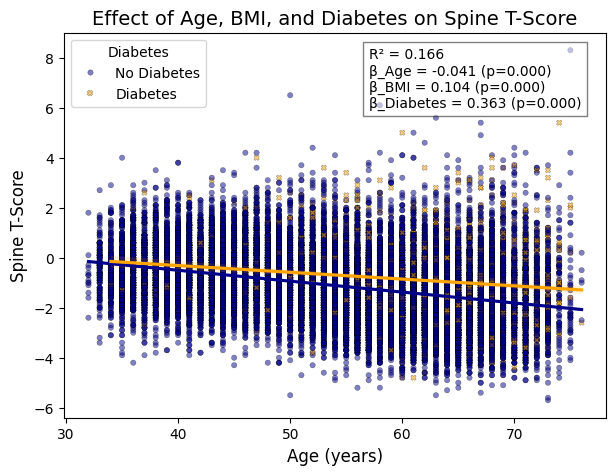

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 確保數據中沒有遺失值
data = data.dropna(subset=["Spine_Tot_T", "AGE", "BMI", "DIABETES_SELF"])

# 進行線性回歸
X = data[["AGE", "BMI", "DIABETES_SELF"]]
X = sm.add_constant(X)  # 加入截距項
y = data["Spine_Tot_T"]
model = sm.OLS(y, X).fit()

# 提取重要的回歸結果
r_squared = model.rsquared  # R²
coeffs = model.params  # 迴歸係數
p_values = model.pvalues  # p 值

# 繪製圖表
plt.figure(figsize=(7,5))

# 🎯 **繪製散布圖**
scatter = sns.scatterplot(
    data=data, x="AGE", y="Spine_Tot_T", 
    hue="DIABETES_SELF", style="DIABETES_SELF",
    palette={0: "darkblue", 1: "orange"},
    s=15, edgecolor="black", alpha=0.5
)

# 🎯 **繪製回歸線**
sns.regplot(
    data=data[data["DIABETES_SELF"] == 0], 
    x="AGE", y="Spine_Tot_T",
    scatter=False, color="darkblue", label="No Diabetes"
)

sns.regplot(
    data=data[data["DIABETES_SELF"] == 1], 
    x="AGE", y="Spine_Tot_T",
    scatter=False, color="orange", label="Diabetes"
)

# 🎯 **手動修正圖例**
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, ["No Diabetes", "Diabetes"], title="Diabetes", loc="upper left")

# 🎯 **在圖上標示回歸結果**
stats_text = f"R² = {r_squared:.3f}\n" \
             f"β_Age = {coeffs['AGE']:.3f} (p={p_values['AGE']:.3f})\n" \
             f"β_BMI = {coeffs['BMI']:.3f} (p={p_values['BMI']:.3f})\n" \
             f"β_Diabetes = {coeffs['DIABETES_SELF']:.3f} (p={p_values['DIABETES_SELF']:.3f})"
plt.text(57, 6, stats_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.5)) 

# 設定標題與座標軸
plt.title("Effect of Age, BMI, and Diabetes on Spine T-Score", fontsize=14)
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Spine T-Score", fontsize=12)

plt.show()


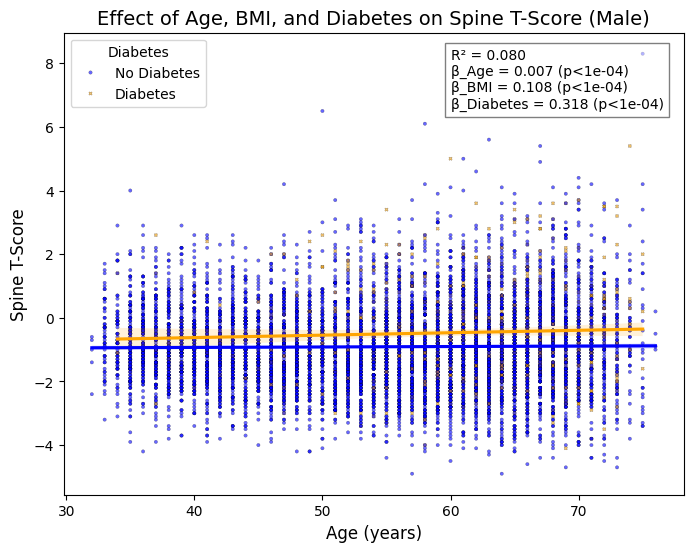

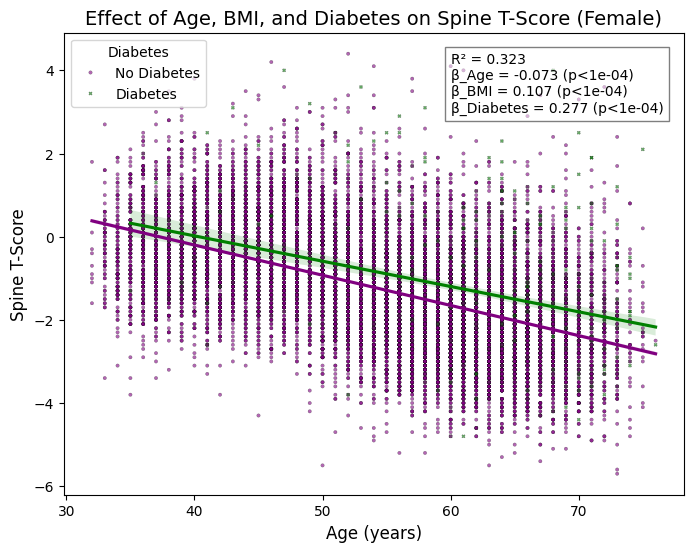

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# 確保數據中沒有遺失值
data = data.dropna(subset=["Spine_Tot_T", "AGE", "BMI", "DIABETES_SELF", "SEX"])

# 定義函數來執行線性回歸並繪圖
def plot_regression(data, gender_label, color1="blue", color2="orange", text_x=61, text_y=6):
    plt.figure(figsize=(8,6))

    # 🎯 **繪製散布圖**
    scatter = sns.scatterplot(
        data=data, x="AGE", y="Spine_Tot_T", 
        hue="DIABETES_SELF", style="DIABETES_SELF",
        palette={0: color1, 1: color2},
        s=6, edgecolor="black", alpha=0.6  # 🔹 點的大小 s=5
    )

    # 🎯 **繪製回歸線**
    sns.regplot(
        data=data[data["DIABETES_SELF"] == 0], 
        x="AGE", y="Spine_Tot_T",
        scatter=False, color=color1, label="No Diabetes"
    )

    sns.regplot(
        data=data[data["DIABETES_SELF"] == 1], 
        x="AGE", y="Spine_Tot_T",
        scatter=False, color=color2, label="Diabetes"
    )

    # 🎯 **執行線性回歸**
    X = data[["AGE", "BMI", "DIABETES_SELF"]]
    X = sm.add_constant(X)  # 加入截距項
    y = data["Spine_Tot_T"]
    model = sm.OLS(y, X).fit()

    # 提取回歸結果
    r_squared = model.rsquared  # R²
    coeffs = model.params  # 迴歸係數
    p_values = model.pvalues  # p 值

    # 🎯 **調整 p 值的顯示格式**
    def format_p(p):
        return f"p<{10**-4:.0e}" if p < 0.0001 else f"p={p:.3f}"

    # 🎯 **在圖上標示回歸結果**
    stats_text = f"R² = {r_squared:.3f}\n" \
                 f"β_Age = {coeffs['AGE']:.3f} ({format_p(p_values['AGE'])})\n" \
                 f"β_BMI = {coeffs['BMI']:.3f} ({format_p(p_values['BMI'])})\n" \
                 f"β_Diabetes = {coeffs['DIABETES_SELF']:.3f} ({format_p(p_values['DIABETES_SELF'])})"
    plt.text(text_x, text_y, stats_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

    # 🎯 **手動修正圖例**
    handles, labels = scatter.get_legend_handles_labels()
    plt.legend(handles, ["No Diabetes", "Diabetes"], title="Diabetes", loc="upper left")

    # 設定標題與座標軸
    plt.title(f"Effect of Age, BMI, and Diabetes on Spine T-Score ({gender_label})", fontsize=14)
    plt.xlabel("Age (years)", fontsize=12)
    plt.ylabel("Spine T-Score", fontsize=12)

    plt.show()

# 🔹 **分別繪製男性與女性的圖**
plot_regression(data[data["SEX"] == 1.0], "Male", color1="blue", color2="orange", text_x=60, text_y=6.6)
plot_regression(data[data["SEX"] == 2.0], "Female", color1="purple", color2="green", text_x=60, text_y=3)


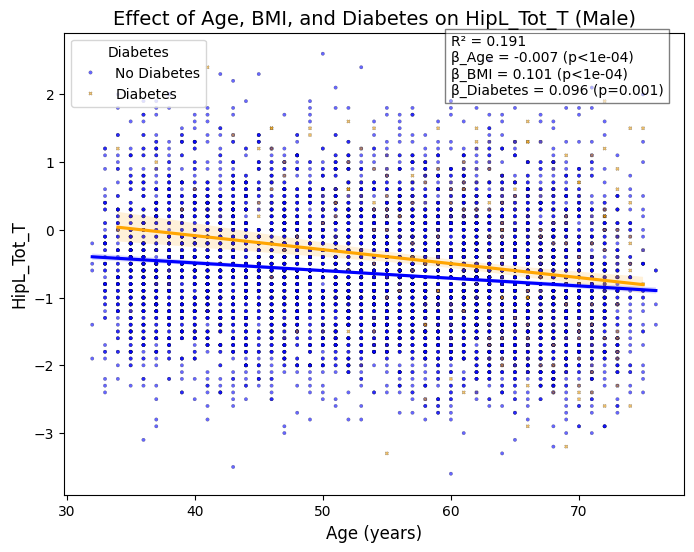

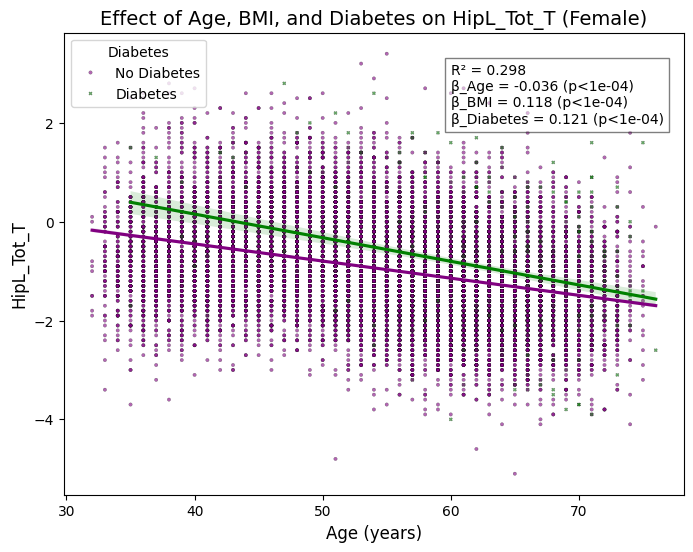

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# 確保數據中沒有遺失值
data = data.dropna(subset=["HipL_Tot_T", "AGE", "BMI", "DIABETES_SELF", "SEX"])

# 定義函數來執行線性回歸並繪圖
def plot_regression(data, gender_label, color1="blue", color2="orange", text_x=61, text_y=6):
    plt.figure(figsize=(8,6))

    # 🎯 **繪製散布圖**
    scatter = sns.scatterplot(
        data=data, x="AGE", y="HipL_Tot_T", 
        hue="DIABETES_SELF", style="DIABETES_SELF",
        palette={0: color1, 1: color2},
        s=6, edgecolor="black", alpha=0.6  # 🔹 點的大小 s=5
    )

    # 🎯 **繪製回歸線**
    sns.regplot(
        data=data[data["DIABETES_SELF"] == 0], 
        x="AGE", y="HipL_Tot_T",
        scatter=False, color=color1, label="No Diabetes"
    )

    sns.regplot(
        data=data[data["DIABETES_SELF"] == 1], 
        x="AGE", y="HipL_Tot_T",
        scatter=False, color=color2, label="Diabetes"
    )

    # 🎯 **執行線性回歸**
    X = data[["AGE", "BMI", "DIABETES_SELF"]]
    X = sm.add_constant(X)  # 加入截距項
    y = data["HipL_Tot_T"]
    model = sm.OLS(y, X).fit()

    # 提取回歸結果
    r_squared = model.rsquared  # R²
    coeffs = model.params  # 迴歸係數
    p_values = model.pvalues  # p 值

    # 🎯 **調整 p 值的顯示格式**
    def format_p(p):
        return f"p<{10**-4:.0e}" if p < 0.0001 else f"p={p:.3f}"

    # 🎯 **在圖上標示回歸結果**
    stats_text = f"R² = {r_squared:.3f}\n" \
                 f"β_Age = {coeffs['AGE']:.3f} ({format_p(p_values['AGE'])})\n" \
                 f"β_BMI = {coeffs['BMI']:.3f} ({format_p(p_values['BMI'])})\n" \
                 f"β_Diabetes = {coeffs['DIABETES_SELF']:.3f} ({format_p(p_values['DIABETES_SELF'])})"
    plt.text(text_x, text_y, stats_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

    # 🎯 **手動修正圖例**
    handles, labels = scatter.get_legend_handles_labels()
    plt.legend(handles, ["No Diabetes", "Diabetes"], title="Diabetes", loc="upper left")

    # 設定標題與座標軸
    plt.title(f"Effect of Age, BMI, and Diabetes on HipL_Tot_T ({gender_label})", fontsize=14)
    plt.xlabel("Age (years)", fontsize=12)
    plt.ylabel("HipL_Tot_T", fontsize=12)

    plt.show()

# 🔹 **分別繪製男性與女性的圖**
plot_regression(data[data["SEX"] == 1.0], "Male", color1="blue", color2="orange", text_x=60, text_y=2)
plot_regression(data[data["SEX"] == 2.0], "Female", color1="purple", color2="green", text_x=60, text_y=2)


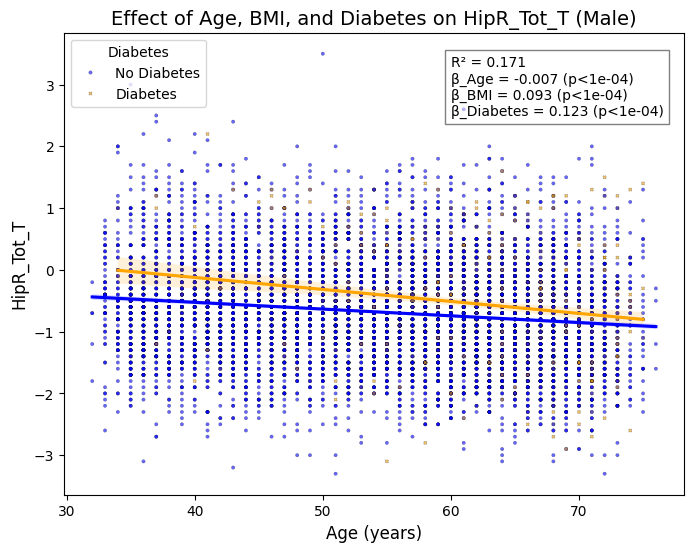

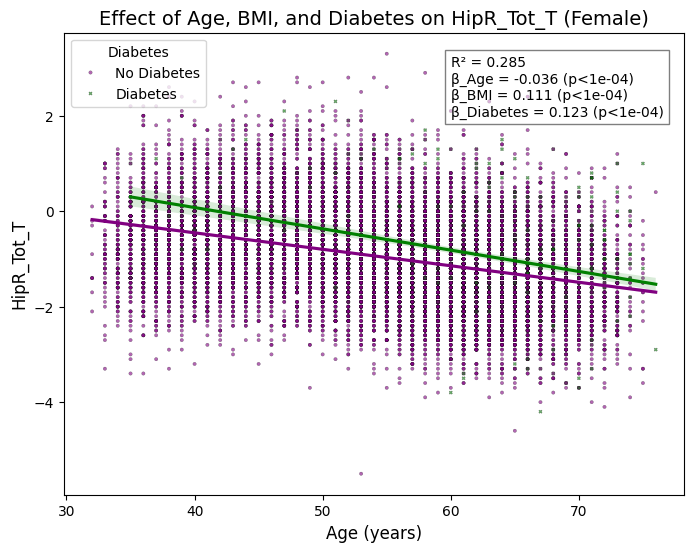

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# 確保數據中沒有遺失值
data = data.dropna(subset=["HipR_Tot_T", "AGE", "BMI", "DIABETES_SELF", "SEX"])

# 定義函數來執行線性回歸並繪圖
def plot_regression(data, gender_label, color1="blue", color2="orange", text_x=61, text_y=6):
    plt.figure(figsize=(8,6))

    # 🎯 **繪製散布圖**
    scatter = sns.scatterplot(
        data=data, x="AGE", y="HipR_Tot_T", 
        hue="DIABETES_SELF", style="DIABETES_SELF",
        palette={0: color1, 1: color2},
        s=6, edgecolor="black", alpha=0.6  # 🔹 點的大小 s=5
    )

    # 🎯 **繪製回歸線**
    sns.regplot(
        data=data[data["DIABETES_SELF"] == 0], 
        x="AGE", y="HipR_Tot_T",
        scatter=False, color=color1, label="No Diabetes"
    )

    sns.regplot(
        data=data[data["DIABETES_SELF"] == 1], 
        x="AGE", y="HipR_Tot_T",
        scatter=False, color=color2, label="Diabetes"
    )

    # 🎯 **執行線性回歸**
    X = data[["AGE", "BMI", "DIABETES_SELF"]]
    X = sm.add_constant(X)  # 加入截距項
    y = data["HipR_Tot_T"]
    model = sm.OLS(y, X).fit()

    # 提取回歸結果
    r_squared = model.rsquared  # R²
    coeffs = model.params  # 迴歸係數
    p_values = model.pvalues  # p 值

    # 🎯 **調整 p 值的顯示格式**
    def format_p(p):
        return f"p<{10**-4:.0e}" if p < 0.0001 else f"p={p:.3f}"

    # 🎯 **在圖上標示回歸結果**
    stats_text = f"R² = {r_squared:.3f}\n" \
                 f"β_Age = {coeffs['AGE']:.3f} ({format_p(p_values['AGE'])})\n" \
                 f"β_BMI = {coeffs['BMI']:.3f} ({format_p(p_values['BMI'])})\n" \
                 f"β_Diabetes = {coeffs['DIABETES_SELF']:.3f} ({format_p(p_values['DIABETES_SELF'])})"
    plt.text(text_x, text_y, stats_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

    # 🎯 **手動修正圖例**
    handles, labels = scatter.get_legend_handles_labels()
    plt.legend(handles, ["No Diabetes", "Diabetes"], title="Diabetes", loc="upper left")

    # 設定標題與座標軸
    plt.title(f"Effect of Age, BMI, and Diabetes on HipR_Tot_T ({gender_label})", fontsize=14)
    plt.xlabel("Age (years)", fontsize=12)
    plt.ylabel("HipR_Tot_T", fontsize=12)

    plt.show()

# 🔹 **分別繪製男性與女性的圖**
plot_regression(data[data["SEX"] == 1.0], "Male", color1="blue", color2="orange", text_x=60, text_y=2.5)
plot_regression(data[data["SEX"] == 2.0], "Female", color1="purple", color2="green", text_x=60, text_y=2)


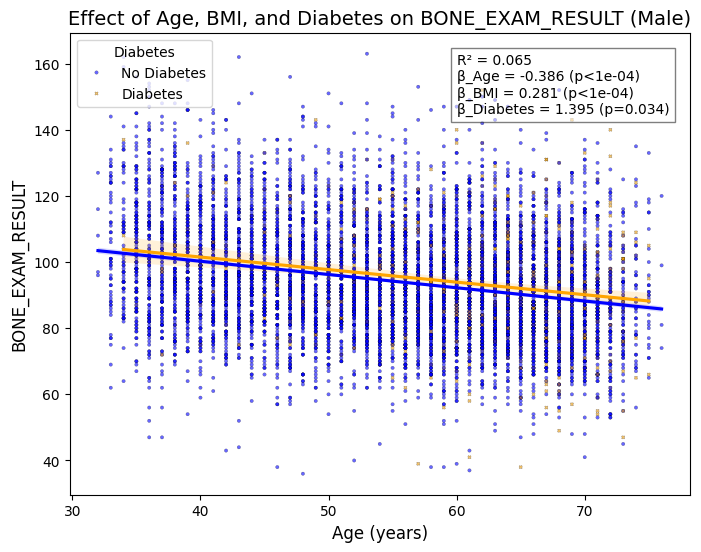

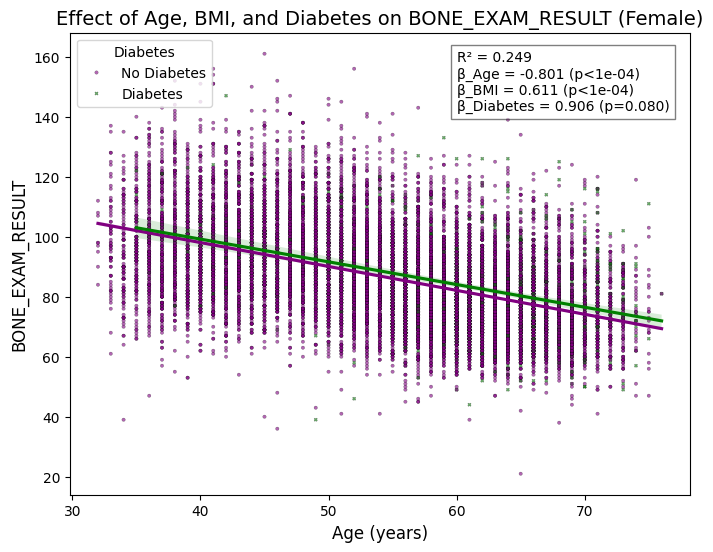

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# 確保數據中沒有遺失值
data = data.dropna(subset=["BONE_EXAM_RESULT", "AGE", "BMI", "DIABETES_SELF", "SEX"])

# 定義函數來執行線性回歸並繪圖
def plot_regression(data, gender_label, color1="blue", color2="orange", text_x=61, text_y=6):
    plt.figure(figsize=(8,6))

    # 🎯 **繪製散布圖**
    scatter = sns.scatterplot(
        data=data, x="AGE", y="BONE_EXAM_RESULT", 
        hue="DIABETES_SELF", style="DIABETES_SELF",
        palette={0: color1, 1: color2},
        s=6, edgecolor="black", alpha=0.6  # 🔹 點的大小 s=5
    )

    # 🎯 **繪製回歸線**
    sns.regplot(
        data=data[data["DIABETES_SELF"] == 0], 
        x="AGE", y="BONE_EXAM_RESULT",
        scatter=False, color=color1, label="No Diabetes"
    )

    sns.regplot(
        data=data[data["DIABETES_SELF"] == 1], 
        x="AGE", y="BONE_EXAM_RESULT",
        scatter=False, color=color2, label="Diabetes"
    )

    # 🎯 **執行線性回歸**
    X = data[["AGE", "BMI", "DIABETES_SELF"]]
    X = sm.add_constant(X)  # 加入截距項
    y = data["BONE_EXAM_RESULT"]
    model = sm.OLS(y, X).fit()

    # 提取回歸結果
    r_squared = model.rsquared  # R²
    coeffs = model.params  # 迴歸係數
    p_values = model.pvalues  # p 值

    # 🎯 **調整 p 值的顯示格式**
    def format_p(p):
        return f"p<{10**-4:.0e}" if p < 0.0001 else f"p={p:.3f}"

    # 🎯 **在圖上標示回歸結果**
    stats_text = f"R² = {r_squared:.3f}\n" \
                 f"β_Age = {coeffs['AGE']:.3f} ({format_p(p_values['AGE'])})\n" \
                 f"β_BMI = {coeffs['BMI']:.3f} ({format_p(p_values['BMI'])})\n" \
                 f"β_Diabetes = {coeffs['DIABETES_SELF']:.3f} ({format_p(p_values['DIABETES_SELF'])})"
    plt.text(text_x, text_y, stats_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

    # 🎯 **手動修正圖例**
    handles, labels = scatter.get_legend_handles_labels()
    plt.legend(handles, ["No Diabetes", "Diabetes"], title="Diabetes", loc="upper left")

    # 設定標題與座標軸
    plt.title(f"Effect of Age, BMI, and Diabetes on BONE_EXAM_RESULT ({gender_label})", fontsize=14)
    plt.xlabel("Age (years)", fontsize=12)
    plt.ylabel("BONE_EXAM_RESULT", fontsize=12)

    plt.show()

# 🔹 **分別繪製男性與女性的圖**
plot_regression(data[data["SEX"] == 1.0], "Male", color1="blue", color2="orange", text_x=60, text_y=145)
plot_regression(data[data["SEX"] == 2.0], "Female", color1="purple", color2="green", text_x=60, text_y=142)
